In [1]:
import os
import glob
import nibabel as nib
import numpy as np
import cv2
import math

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data_path = '../data/training/'
scan_path = os.path.join(data_path, 'vs_gk_11')

t1_path = glob.glob(os.path.join(scan_path, '*_t1_*'))[0]
t2_path = glob.glob(os.path.join(scan_path, '*_t2_*'))[0]
seg_path = glob.glob(os.path.join(scan_path, '*_seg_*'))[0]
print(t1_path)

../data/training/vs_gk_11/vs_gk_t1_refT2.nii.gz


In [3]:
t1 = nib.load(t1_path).get_fdata()
t2 = nib.load(t2_path).get_fdata()
seg = nib.load(seg_path).get_fdata()

seg.shape

(448, 448, 80)

In [4]:
seg2 = nib.load(seg_path).get_fdata()
seg2[20:100, 20:100, 20] = 2
seg2[200:400, 20:100, 20] = 3

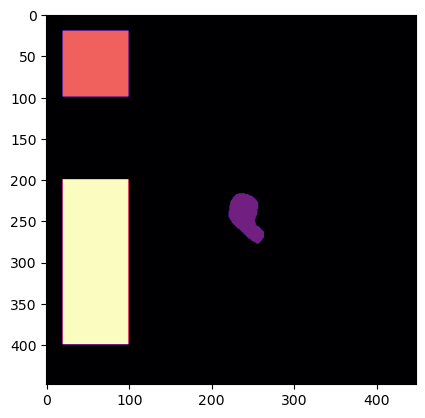

In [5]:
plt.imshow(seg2[:,:,20], cmap='magma')

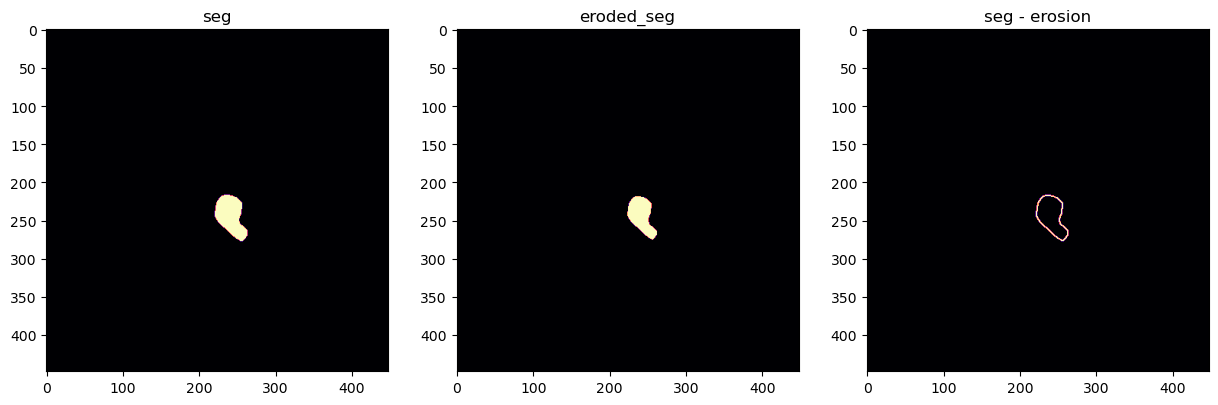

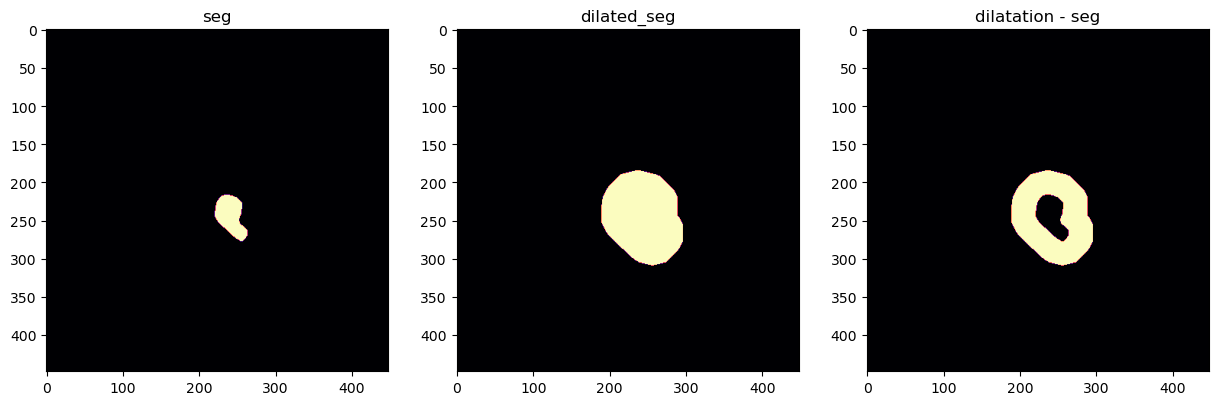

In [6]:
slice = 20

erosion_kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(5, 5))
dilatation_kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(17, 17))
eroded_seg = cv2.erode(seg[:,:,slice], kernel=erosion_kernel)
dilated_seg = cv2.dilate(seg[:,:,slice], kernel=dilatation_kernel, iterations=4)

diff = seg[:,:,slice] - eroded_seg
diff2 = dilated_seg - seg[:,:,slice]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))
ax1.imshow(seg[:,:,slice], cmap = 'magma')
ax1.set_title('seg')
ax2.imshow(eroded_seg, cmap='magma')
ax2.set_title('eroded_seg')
ax3.imshow(diff, cmap='magma')
ax3.set_title('seg - erosion')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 10))
ax1.imshow(seg[:,:,slice], cmap = 'magma')
ax1.set_title('seg')
ax2.imshow(dilated_seg, cmap='magma')
ax2.set_title('dilated_seg')
ax3.imshow(diff2, cmap='magma')
ax3.set_title('dilatation - seg')
plt.show()

In [7]:
border_idx = np.where(diff == 1)
print(border_idx[0][:10])
print(border_idx[1][:10])

border_coords = list(zip(*border_idx))
print(border_coords[:10])

[217 217 217 217 217 217 217 217 218 218]
[233 234 235 236 237 238 239 240 230 231]
[(217, 233), (217, 234), (217, 235), (217, 236), (217, 237), (217, 238), (217, 239), (217, 240), (218, 230), (218, 231)]


In [8]:
inner_idx = np.where(seg[:,:,slice] == 1)
inner_coords = list(zip(*inner_idx))
inner_coords = list(set(inner_coords) - set(border_coords))
np.random.shuffle(inner_coords)

outer_idx = np.where(diff2 == 1)
outer_coords = list(zip(*outer_idx))
outer_coords = list(set(outer_coords) - set(inner_coords))
np.random.shuffle(outer_coords)

In [9]:
b = nib.load(seg_path).get_fdata()
for c in outer_coords:
    b[c[0], c[1], slice] = 2

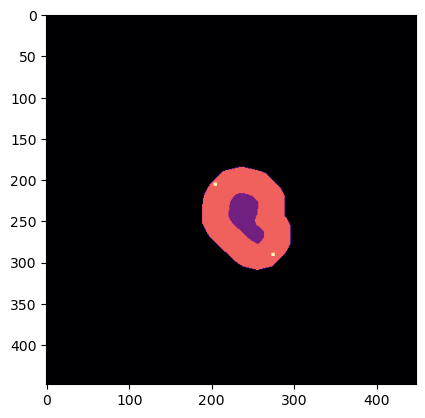

In [10]:
for c in outer_coords[:2]:
    b[c[0]:c[0]+4, c[1]:c[1]+4, slice] = 3
plt.imshow(b[:,:,slice], cmap='magma')

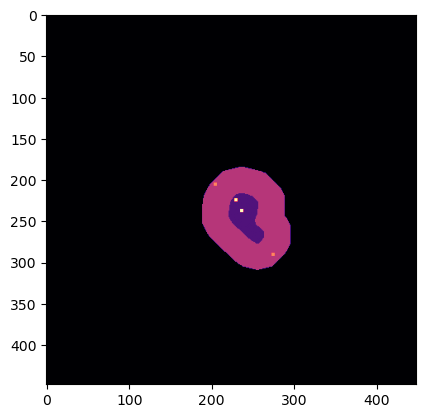

In [11]:
for c in inner_coords[:2]:
    b[c[0]:c[0]+4, c[1]:c[1]+4, slice] = 4
plt.imshow(b[:,:,slice], cmap='magma')

In [12]:
outer_clicks = list(zip(*np.where(b[:,:,slice] == 4)))
print(len(outer_clicks))
outer_clicks

32


[(223, 228),
 (223, 229),
 (223, 230),
 (223, 231),
 (224, 228),
 (224, 229),
 (224, 230),
 (224, 231),
 (225, 228),
 (225, 229),
 (225, 230),
 (225, 231),
 (226, 228),
 (226, 229),
 (226, 230),
 (226, 231),
 (236, 235),
 (236, 236),
 (236, 237),
 (236, 238),
 (237, 235),
 (237, 236),
 (237, 237),
 (237, 238),
 (238, 235),
 (238, 236),
 (238, 237),
 (238, 238),
 (239, 235),
 (239, 236),
 (239, 237),
 (239, 238)]

In [13]:
fig = px.imshow(b[:,:,slice])
fig.update_coloraxes(
    showscale=False,
    colorscale=[
        (0.0, 'black'),
        (0.25, 'rgb(251, 252, 197)'),
        (0.5, 'rgb(245, 212, 66)'),
        (0.75, 'blue'),
        (1, 'red'),
    ],
)
fig.show()

In [16]:
b = nib.load(seg_path).get_fdata()
for c in outer_coords:
    b[c[0], c[1], slice] = 2

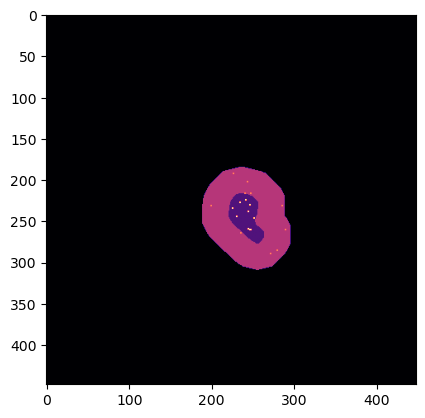

In [18]:
for c in inner_coords[:10]:
    b[c[0]:c[0]+2, c[1]:c[1]+2, slice] = 4

In [21]:
fig = px.imshow(b[:,:,slice])
fig.update_coloraxes(
    showscale=False,
    colorscale=[
        (0.0, 'black'),
        (0.25, 'rgb(251, 252, 197)'),
        (0.5, 'rgb(245, 212, 66)'),
        (0.75, 'blue'),
        (1, 'red'),
    ],
)
fig.show()